In [1]:
from scipy.optimize import curve_fit
import numpy as np

import time
import matplotlib.pyplot as plt
import matplotlib

font = 18   
legendfont = 1
matplotlib.rc('font',weight='bold')
matplotlib.rc('font',size=font)
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

%matplotlib inline

In [2]:
# Reference : https://en.wikipedia.org/wiki/Sorting_algorithm

## 0) Insertion sort 
#### For each element, is that element less than previous elements? If so, swap.
#### Best: O(n)
#### Worst: O(n^2) -> Reversed list

In [16]:
a = [ 6,5,3,1,8,7,2,4 ]
xmax = 5000
xmin = 500

In [27]:
# Loop through all iterations; while jth entry is less than j-1th, swap entries
# Best n, Worst n^2
def insertionSort(a):
    n_swaps = 0
    
    for i in range(1,len(a)):
        j = i
        while a[j] < a[j-1] and j > 0:
            temp = a[j-1]
            a[j-1] = a[j]
            a[j] = temp
            j -= 1    
            n_swaps += 1
    return a

In [28]:
# Test out time complexity 
insert_best = []; insert_worst = []
x_axis = []

for i in range(xmin,xmax,100):
    if i % 500 == 0:
        print( "Iteration %d "%i)
    c = [ k for k in range(i)]
    d = [ i - k for k in range(i) ]
    
    start = time.time()
    insertionSort(c)
    end = time.time()
    insert_best.append(end - start)

    start2 = time.time()
    insertionSort(d)
    end2 = time.time()
    insert_worst.append(end2 - start2)

    x_axis.append(i)

Iteration 500 
Iteration 1000 
Iteration 1500 
Iteration 2000 
Iteration 2500 
Iteration 3000 
Iteration 3500 
Iteration 4000 
Iteration 4500 


In [29]:
p_insert_best = np.poly1d(np.polyfit(x_axis,insert_best,1))
p_insert_worst = np.poly1d(np.polyfit(x_axis,insert_worst,2))

Text(0.5,1,'Insertion Sort Worst Case')

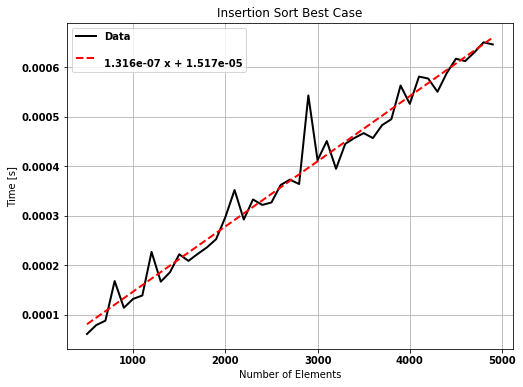

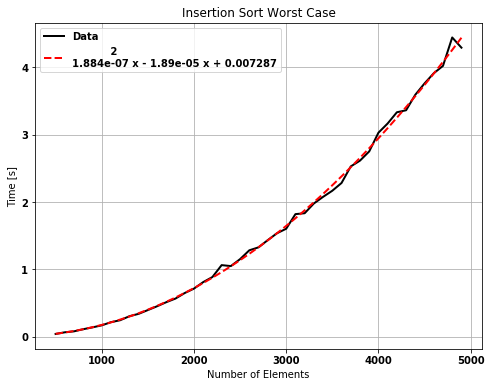

In [30]:
plt.figure(figsize=(8,6))
plt.plot(x_axis,insert_best,color='k',lw=2,label='Data')
plt.plot(x_axis,p_insert_best(x_axis),label='%s'%str(p_insert_best),color='r',ls='--',lw=2)
plt.grid(True)
plt.xlabel('Number of Elements')
plt.ylabel('Time [s]')
plt.legend(loc=0)
plt.title('Insertion Sort Best Case')

plt.figure(figsize=(8,6))
plt.plot(x_axis,insert_worst,color='k',lw=2,label='Data')
plt.plot(x_axis,p_insert_worst(x_axis),color='r',lw=2,ls='--',label='%s'%str(p_insert_worst))
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('Number of Elements')
plt.ylabel('Time [s]')
plt.title('Insertion Sort Worst Case')


## 1) Bubble Sort: 
#### While swaps are still needed, compare all adjacent elements in list, and bubble large elements up to the top
#### Best Case : O(n)
#### Worst Cast: O(n^2)

In [31]:
a = [ 6,5,3,1,8,7,2,4 ]

In [32]:
# Loop through list comparing adjacent pairs.  Swap pairs if j > j-1
def bubbleSort(a):
    
    not_sorted = True
    
    while not_sorted:
        
        no_swaps = True
        
        for j in range(1,len(a)):
            if a[j] < a[j-1]:
                a[j-1], a[j] = a[j], a[j-1]
                no_swaps = False
                
        if no_swaps:
            not_sorted = False
            break
           
    return a

In [33]:
bubbleSort(a)

[1, 2, 3, 4, 5, 6, 7, 8]

In [34]:
bubble_best = []; bubble_worst = []

for i in range(xmin,xmax,100):
    if i % 500 == 0:
        print( "Iteration %d "%i)
    c = [ k for k in range(i)]
    d = [ i - k for k in range(i) ]
    
    start = time.time()
    bubbleSort(c)
    end = time.time()
    bubble_best.append(end - start)

    start2 = time.time()
    bubbleSort(d)
    end2 = time.time()
    bubble_worst.append(end2 - start2)

Iteration 500 
Iteration 1000 
Iteration 1500 
Iteration 2000 
Iteration 2500 
Iteration 3000 
Iteration 3500 
Iteration 4000 
Iteration 4500 


In [35]:
p_bubble_best = np.poly1d(np.polyfit(x_axis,bubble_best,1))
p_bubble_worst = np.poly1d(np.polyfit(x_axis,bubble_worst,2))

Text(0.5,1,'Bubble Sort Worst Case')

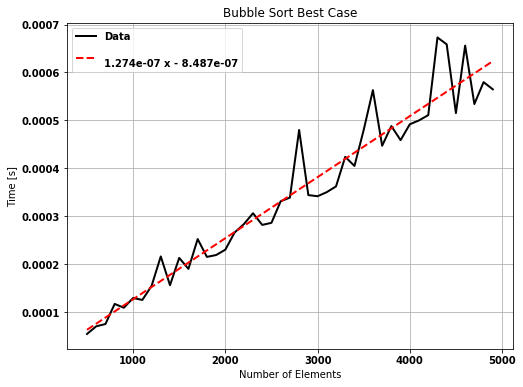

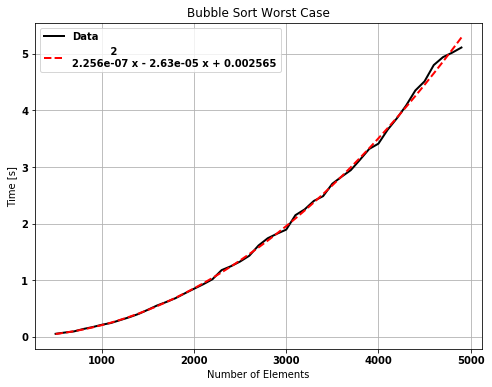

In [36]:
plt.figure(figsize=(8,6))
plt.plot(x_axis,bubble_best,color='k',lw=2,label='Data')
plt.plot(x_axis,p_bubble_best(x_axis),label='%s'%str(p_bubble_best),color='r',ls='--',lw=2)
plt.grid(True)
plt.xlabel('Number of Elements')
plt.ylabel('Time [s]')
plt.legend(loc=0)
plt.title('Bubble Sort Best Case')

plt.figure(figsize=(8,6))
plt.plot(x_axis,bubble_worst,color='k',lw=2,label='Data')
plt.plot(x_axis,p_bubble_worst(x_axis),color='r',lw=2,ls='--',label='%s'%str(p_bubble_worst))
#plt.plot(x_axis,p_insert_worst(x_axis),color='r',lw=2,ls='--',label='%s'%str(p_insert_worst))
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('Number of Elements')
plt.ylabel('Time [s]')
plt.title('Bubble Sort Worst Case')


## 2) Selection Sort 
#### Find smallest element in list. Swap smallest element to beginning
#### Best case O(n^2)
#### Worst case O(n^2)

In [39]:
# Loop through list to find smallest element; move minimum element to the minimum open it
# Best n^2, Worst n^2
def selectionSort(a):
    
    for i in range(0,len(a)):
        
        min_value = a[i]
        min_it = i
        
        for j in range(i+1,len(a)):
            if a[j] < min_value:
                min_value = a[j]
                min_it = j
      
        if min_it != i:
            temp = a[i]
            a[i] = a[min_it]
            a[min_it] = temp
           
    return a

In [40]:
a = [ 6,5,3,1,8,7,2,4 ]
selectionSort(a)

[1, 2, 3, 4, 5, 6, 7, 8]

## 3) Quicksort
#### Best : O(nlogn)
#### Worst : O(n^2)

In [16]:
# From https://www.geeksforgeeks.org/python-program-for-quicksort/
# This function takes last element as pivot, places
# the pivot element at its correct position in sorted
# array, and places all smaller (smaller than pivot)
# to left of pivot and all greater elements to right
# of pivot
def partition(arr,low,high):
    i = ( low-1 )         # index of smaller element
    pivot = arr[high]     # pivot
 
    for j in range(low , high):
 
        # If current element is smaller than or
        # equal to pivot
        if   arr[j] <= pivot:
         
            # increment index of smaller element
            i = i+1
            arr[i],arr[j] = arr[j],arr[i]
 
    arr[i+1],arr[high] = arr[high],arr[i+1]
    return ( i+1 )
 
# The main function that implements QuickSort
# arr[] --> Array to be sorted,
# low  --> Starting index,
# high  --> Ending index
 
# Function to do Quick sort
def quickSort(arr,low,high):
    if low < high:
 
        # pi is partitioning index, arr[p] is now
        # at right place
        pi = partition(arr,low,high)
 
        # Separately sort elements before
        # partition and after partition
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)

In [22]:
a = [ 6,5,3,1,8,7,2,4 ]
#a = [1,3,2,8,6,4]

In [23]:
quickSort(a,0,len(a)-1)
print (a)

[1, 2, 3, 4, 5, 6, 7, 8]


In [3]:
# Determine a pivot: compare each element to the pivot starting from the left;
# move pivot + left boundaries accordingly -- apply recursively until sorted
# Best nlogn, n^2
# Best when chosen pivots are more sophisticated than just "leftmost element" as done here
# Ex : Median of first, last middle lelement. 
# def quickSort(a):
    
#     if len(a) < 1:
#         return a
    
#     if len(a) == 2 and a[1] < a[0]:
#         temp = a[1]
#         a[1] = a[0]
#         a[0] = temp
#         return a
        
#     left_most = 0
#     pivot_index = len(a)-1
#     pivot = a[pivot_index] 
    
#     while left_most != pivot_index:

#         if a[left_most] > pivot:
#             temp = a[pivot_index - 1]
#             a[pivot_index-1] = a[pivot_index]
#             a[pivot_index] = a[left_most]
#             a[left_most] = temp
#             pivot_index -= 1
#         else:
#             left_most += 1

#     a[:pivot_index] = quickSort(a[:pivot_index])
#     a[pivot_index+1:] = quickSort(a[pivot_index+1:])
            
#     return a

In [4]:
a = [ 6,5,3,1,8,7,2,4 ]
a = [1,3,2,8,6,4]
quickSort(a)

[1, 3, 2, 6, 4, 8]

## 4) Mergesort

In [58]:
# First, divide list into smalelst possible elements (all n = 1 lists) recursively
# Then merge the left and right lists together 
# Best: nlogn, Worst n^2
def mergeSort(a):
    
    if len(a) <= 1:
        #print 'Size 1 is sorted '
        return a

    left = a[int(len(a)/2):]
    right = a[:int(len(a)/2)]
    #print '\n\nStarting now ',right,  left
    left = mergeSort(left)
    right = mergeSort(right)    
    
    #print 'Merging: ', merge(left,right)
    return merge(left,right)

    
def merge(left, right):
    
    right_ix = 0; left_ix = 0
    new_v = []
    
    tot_len = len(left) + len(right) 
    while (right_ix + left_ix) < tot_len :
        
        if right_ix == len(right):
            new_v.append(left[left_ix])
            left_ix += 1
            continue
        if left_ix == len(left):
            new_v.append(right[right_ix])
            right_ix += 1
            continue

        if right[right_ix] < left[left_ix]:
            new_v.append(right[right_ix])
            right_ix += 1            
        else:
            new_v.append(left[left_ix])
            left_ix += 1
            
    return new_v

In [59]:
a = [ 6,5,3,1,8,7,2,4 ]
mergeSort(a)
# best and worst case: nlogn

[1, 2, 3, 4, 5, 6, 7, 8]

## 5) Heap Sort 

In [52]:
a = [ 6,5,3,1,8,7,2,4 ]

In [55]:
# First, build a heap. Do this by noting each node i's children (without)
# sorting will be 2*i + 1 and 2*i + 2
# https://www.geeksforgeeks.org/heap-sort/
def heapSort(a):
    
    root_i = a[0]
    n = len(a)
    # Here we are constructing the heap from the full array
    # For each item, check that the left and right node are not 
    # larger than the root. If so, then swap.
    for i in range(n,-1,-1):
        buildHeap(a,n,i)

    # Now heap is built, and mostly sorted.  Loop through once more.
    # Start by swapping the root (largest value) with the end value.
    # Remove this largest value, and then re-make the heap with the remaining
    # values, bubbling the new largest value to the root
    for i in range(n-1,0,-1):
        #print "In here"
        a[0], a[i] = a[i], a[0]
        buildHeap(a,i,0)
    
    return a
        
def buildHeap(a,n,i):

    root_i = i
    left_i = 2*i + 1
    right_i = 2*i + 2
        
    if left_i < n and a[i] < a[left_i] :
        root_i = left_i
    if right_i < n and a[root_i] < a[right_i] :
        root_i = right_i
        
    # If we need a swap, repeat until largets value bubbles to its true root
    if root_i != i:
        a[root_i], a[i] = a[i], a[root_i]
        buildHeap(a,root_i,i)
                

In [57]:
print (heapSort(a))

[1, 2, 4, 5, 3, 6, 7, 8]
